# A quick wedge model

Let's make a quick wedge model and its associated synthetic.

We'll do a zero-offset (aka normal incidence) synthetic, and a full offset one.

---

## Zero offset

We can produce a simple wedge model just by calling the `wedge()` function.

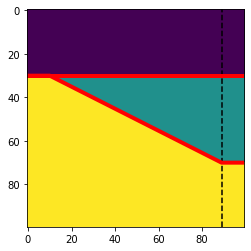

In [1]:
import matplotlib.pyplot as plt
import bruges as bg

w, top, base, ref = bg.models.wedge()

plt.imshow(w, interpolation='none')
plt.axvline(ref, color='k', ls='--')
plt.plot(top, 'r-', lw=4)
plt.plot(base, 'r-', lw=4)
plt.show()

You can then use this integer model to index into an array of rock properties:

In [2]:
import numpy as np

vps = np.array([2320, 2350, 2350])
rhos = np.array([2650, 2600, 2620])

We can use these to make `vp` and `rho` earth models. We can use NumPy’s fancy indexing by passing our array of indicies to access the rock properties (in this case acoustic impedance) for every element at once.

In [3]:
vp = vps[w]
rho = rhos[w]

Each of these new arrays is the shape of the model, but is filled with a rock property:

In [4]:
vp.shape

(100, 100)

In [5]:
vp[:5, :5]

array([[2320, 2320, 2320, 2320, 2320],
       [2320, 2320, 2320, 2320, 2320],
       [2320, 2320, 2320, 2320, 2320],
       [2320, 2320, 2320, 2320, 2320],
       [2320, 2320, 2320, 2320, 2320]])

Now we can create the reflectivity profile:

In [6]:
rc = bg.reflection.acoustic_reflectivity(vp, rho)

Then make a wavelet and convolve it with the reflectivities:

In [7]:
ricker, _ = bg.filters.ricker(duration=0.064, dt=0.001, f=40)

syn = bg.filters.convolve(rc, ricker)

syn.shape

(100, 100)

The easiest way to check everything worked is probably to plot it.

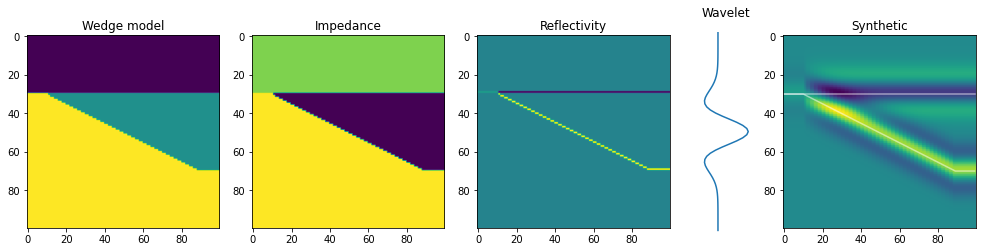

In [8]:
fig, axs = plt.subplots(figsize=(17, 4), ncols=5,
                        gridspec_kw={'width_ratios': (4, 4, 4, 1, 4)})
axs[0].imshow(w)
axs[0].set_title('Wedge model')
axs[1].imshow(vp * rho)  
axs[1].set_title('Impedance')
axs[2].imshow(rc)
axs[2].set_title('Reflectivity')
axs[3].plot(ricker, np.arange(ricker.size))
axs[3].axis('off')
axs[3].set_title('Wavelet')
axs[4].imshow(syn)
axs[4].set_title('Synthetic')
axs[4].plot(top, 'w', alpha=0.5)
axs[4].plot(base, 'w', alpha=0.5)
plt.show()

## Alternative workflow

In the last example, we made an array of integers, then used indexing to place rock properties in the array, using the index as a sort of look-up.

But we could make the impedance model directly, passing rock properties in to the `wedge()` function via teh `strat` argument. It just depends how you want to make your models. 

The `strat` argument was the default `[0, 1, 2]` in the last example. Let's pass in the rock properties instead. 

In [9]:
vps = np.array([2320, 2350, 2350])
rhos = np.array([2650, 2600, 2620])

impedances = vps * rhos

w, top, base, ref = bg.models.wedge(strat=impedances)

And look at the result:

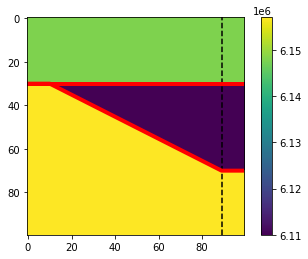

In [10]:
plt.imshow(w, interpolation='none') 
plt.axvline(ref, color='k', ls='--')
plt.plot(top, 'r-', lw=4)
plt.plot(base, 'r-', lw=4)
plt.colorbar()
plt.show()

Now the wedge contains rock properties, not integer labels.

## Offset reflectivity

Let's make things more realistic by computing offset reflectivities, not just normal incidence (acoustic) reflectivity. We'll need Vs as well:

In [11]:
vps = np.array([2320, 2350, 2350])
vss = np.array([1150, 1250, 1200])
rhos = np.array([2650, 2600, 2620])

We need the model with integers like 0, 1, 2 again:

In [12]:
w, top, base, ref = bg.models.wedge()

Index to get the property models:

In [13]:
vp = vps[w]
vs = vss[w]
rho = rhos[w]

Compute the reflectivity for angles up to 45 degrees:

In [14]:
rc = bg.reflection.reflectivity(vp, vs, rho, theta=range(46))

rc.shape

(46, 100, 100)

The result is three-dimensional: the angles are in the first dimension. So the zero-offset reflectivities are in `w[0]` and 30 degrees is at `w[30]`.

Or, you can slice this cube in another orientation and see how reflectivity varies with angle:

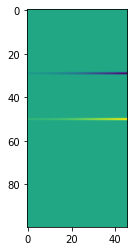

In [15]:
plt.imshow(rc.real[:, :, 50].T)

Notice that we're looking only at the real components (offset reflectivities are complex numbers), and we have to transpose the array to get it the right way around.

---
&copy; 2022 Agile Scientific, licensed CC-BY / Apache 2.0